epoch 1, loss = 5893.8081
epoch 11, loss = 4359.3892
epoch 21, loss = 3251.2898
epoch 31, loss = 2450.1001
epoch 41, loss = 1870.1664
epoch 51, loss = 1449.9521
epoch 61, loss = 1145.1754
epoch 71, loss = 923.9280
epoch 81, loss = 763.1855
epoch 91, loss = 646.3140


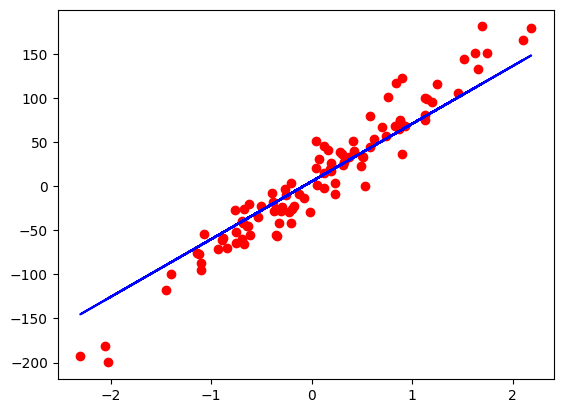

In [4]:
# 1) Design model(input, output, size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights


import torch
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

# f = w*x

# f = 2*x

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features  = X.shape

input_size = n_features
output_size = 1


model = nn.Linear(input_size, output_size)

# class LinearRegression(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(LinearRegression, self).__init__()
#         # define layers
#         self.lin = nn.Linear(input_dim, output_dim)

#     def forward(self, x):
#         return self.lin(x)
    
# model = LinearRegression(input_size, output_size)

# print(f'Prediction for training: f(5) = {model(X_test).item():.3f}')

# Training 
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # forward pass
    y_pred = model(X)

    # loss 
    l = loss(y, y_pred)

    # backward prop
    l.backward()  # dl/w

    # update the weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if epoch % 10 ==0:
        print(f'epoch {epoch+1}, loss = {l.item():.4f}')

# plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, 'b')
plt.show()
